C:\Users\caio-\AppData\Local\Temp\ipykernel_3100\3992468861.py:41: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=64).
  axes[2, 0].specgram(data1[i, :], Fs=FS)
C:\Users\caio-\AppData\Local\Temp\ipykernel_3100\3992468861.py:46: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=64).
  axes[2, 1].specgram(data2[i, :], Fs=FS)


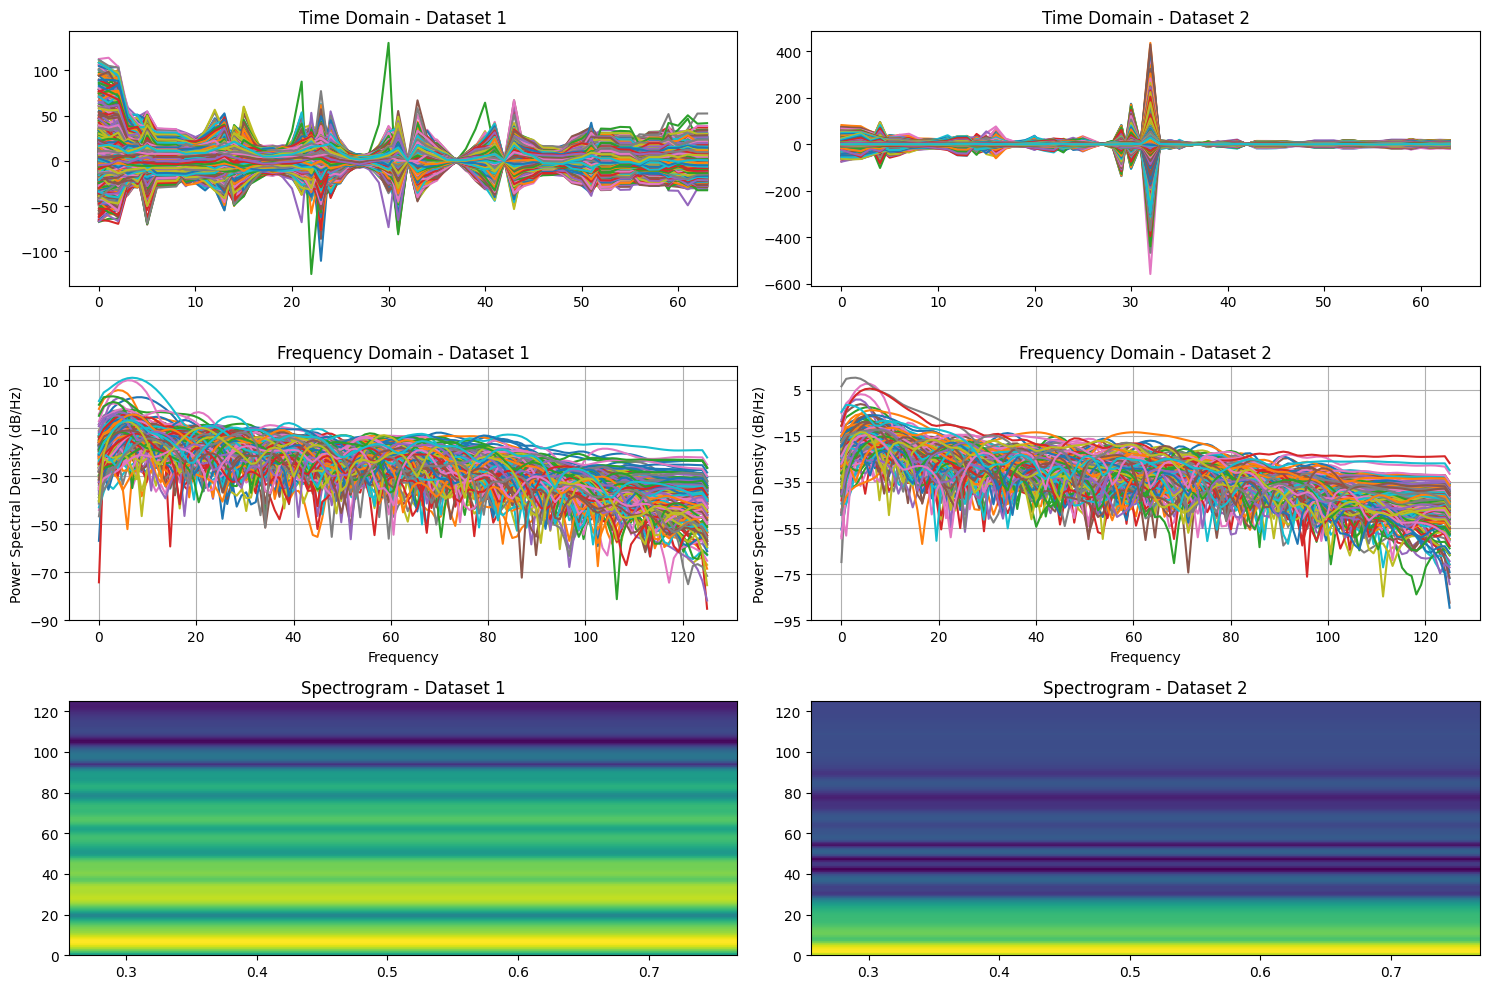

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from utils import print_graphs
from sklearn.preprocessing import LabelEncoder



dataset1 = np.load("../datasets/beta/data1.npy")
dataset2 = np.load("../datasets/beta/data2.npy")


labels1 = np.load("../datasets/beta/labels1.npy")
labels2 = np.load("../datasets/beta/labels2.npy")


def print_graphs(data1, data2, FS=250):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

    # Plot time domain for dataset1
    for i in range(data1.shape[0]):
        axes[0, 0].plot(data1[i, :])
    axes[0, 0].set_title('Time Domain - Dataset 1')

    # Plot time domain for dataset2
    for i in range(data2.shape[0]):
        axes[0, 1].plot(data2[i, :])
    axes[0, 1].set_title('Time Domain - Dataset 2')

    # Plot frequency domain for dataset1
    for i in range(data1.shape[0]):
        axes[1, 0].psd(data1[i, :], Fs=FS)
    axes[1, 0].set_title('Frequency Domain - Dataset 1')

    # Plot frequency domain for dataset2
    for i in range(data2.shape[0]):
        axes[1, 1].psd(data2[i, :], Fs=FS)
    axes[1, 1].set_title('Frequency Domain - Dataset 2')

    # Plot spectrogram for dataset1
    for i in range(data1.shape[0]):
        axes[2, 0].specgram(data1[i, :], Fs=FS)
    axes[2, 0].set_title('Spectrogram - Dataset 1')

    # Plot spectrogram for dataset2
    for i in range(data2.shape[0]):
        axes[2, 1].specgram(data2[i, :], Fs=FS)
    axes[2, 1].set_title('Spectrogram - Dataset 2')

    plt.tight_layout()
    plt.show()


print_graphs(dataset1, dataset2)

    


In [7]:
import mne

n_channels = 64
sfreq = 250
## ch names geradas
ch_names = ["FP1", "FPZ", "FP2", "AF3", "AF4", "F7", "F5", "F3", "F1", "FZ", "F2", "F4", "F6", "F8", "FT7", "FC5", "FC3", "FC1", "FCZ", "FC2", "FC4", "FC6", "FT8", "T7", "C5", "C3", "C1", "CZ", "C2", "C4", "C6", "T8", "M1", "TP7", "CP5", "CP3", "CP1", "CPZ", "CP2", "CP4", "CP6", "TP8", "M2", "P7", "P5", "P3", "P1", "PZ", "P2", "P4", "P6", "P8", "PO7", "PO5", "PO3", "POZ", "PO4", "PO6", "PO8", "CB1", "O1", "OZ", "O2", "CB2"]
ch_types = ['eeg'] * n_channels
info = mne.create_info(ch_names, sfreq=sfreq, ch_types=ch_types)


def create_mne_epochs(data, labels, ch_names, filename=""):
    sfreq=250
    n_channels = len(ch_names)
    ch_types = ['eeg'] * n_channels
    info = mne.create_info(ch_names, sfreq=sfreq, ch_types=ch_types)

    le = LabelEncoder()
    events = np.column_stack((
        np.arange(len(labels)),
        np.zeros(len(labels), dtype=int),
        le.fit_transform(labels)
    ))

    event_dict = {str(value): index for index, value in enumerate(sorted(set(labels)))}

    mne_data = mne.EpochsArray(data, info, events, event_id=event_dict)

    keep_channels = [ch for ch in ch_names if ch.startswith('PO') or ch.startswith('Pz') or ch.startswith('O')]

    drop_channels = [ch for ch in mne_data.info['ch_names'] if ch not in keep_channels]

    mne_data = mne_data.drop_channels(drop_channels)

    freq_low=7
    freq_high=17
    filtered_mne_data = mne_data.filter(freq_low, freq_high)
    
    filtered_mne_data.save(filename, overwrite=True)

    return mne_data



mne_data1 = create_mne_epochs(dataset1, labels1, ch_names,"beta_epo1.fif")

mne_data2 = create_mne_epochs(dataset2, labels2, ch_names,"beta_epo2.fif")



##show data in mne
mne_data1.plot(n_epochs=10, n_channels=10)
mne_data2.plot(n_epochs=10, n_channels=10)




ValueError: could not convert string to float: 'beta_epo1.fif'